# How to Train Computer Vision Models on Satellite Imagery - Part 2

Using [Kaggle Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv)

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('yield_df.csv')
df = df.iloc[: , 1:]
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [4]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Area,0.0
Item,0.0
Year,0.0
hg/ha_yield,0.0
average_rain_fall_mm_per_year,0.0
pesticides_tonnes,0.0
avg_temp,0.0


<AxesSubplot: >

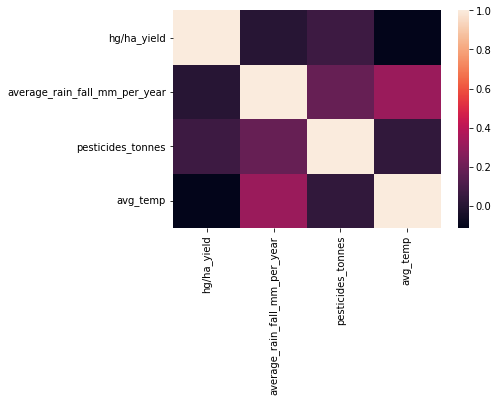

In [6]:
corr = df.drop(['Area', 'Item', 'Year'],axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
df.Area.value_counts(normalize=True) * 100

India         14.333263
Brazil         8.062460
Mexico         5.212095
Pakistan       5.130656
Japan          3.420438
                ...    
Estonia        0.148715
Belgium        0.138092
Bahrain        0.102684
Sudan          0.099143
Montenegro     0.084980
Name: Area, Length: 101, dtype: float64

In [8]:
df.Area.value_counts(normalize=True) * 100

India         14.333263
Brazil         8.062460
Mexico         5.212095
Pakistan       5.130656
Japan          3.420438
                ...    
Estonia        0.148715
Belgium        0.138092
Bahrain        0.102684
Sudan          0.099143
Montenegro     0.084980
Name: Area, Length: 101, dtype: float64

In [9]:
def plot_pie(col):
    fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
    plt.title("Top 10 " + col + "by Yield")
    top_col_by_yield = df.groupby([col],sort=True)['hg/ha_yield'].sum().nlargest(10)
    ax.pie(top_col_by_yield.values, labels=top_col_by_yield.index, autopct='%1.1f%%')
    plt.show()

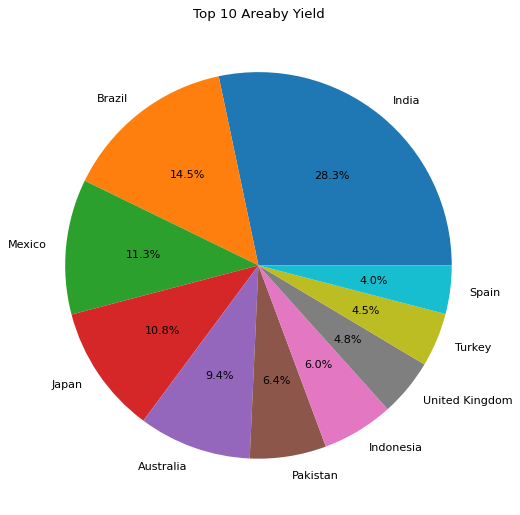

In [10]:
plot_pie('Area')

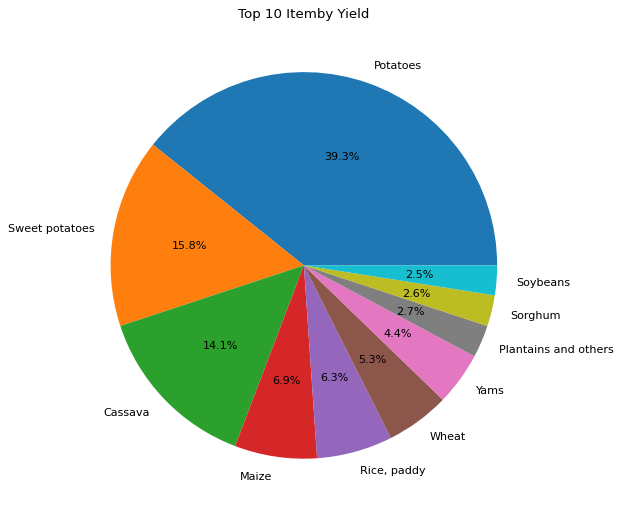

In [11]:
plot_pie('Item')

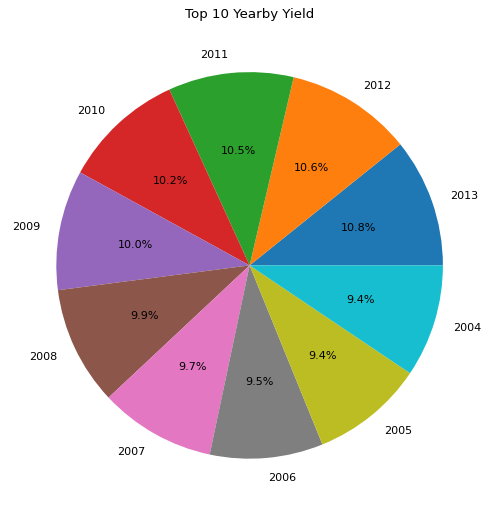

In [12]:
plot_pie('Year')

## ML Prediction

In [13]:
sc = StandardScaler()
pca = PCA(n_components=50)

df = pd.get_dummies(df, columns=['Area', "Item"])
x = df.drop(['hg/ha_yield', 'Year'], axis=1)
y = df['hg/ha_yield']
x.head()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = sc.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
fitted_pca = pca.fit(x_train)
x_train = fitted_pca.transform(x_train)
x_test = fitted_pca.transform(x_test)

In [14]:
model = DecisionTreeRegressor()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.9515554236040907

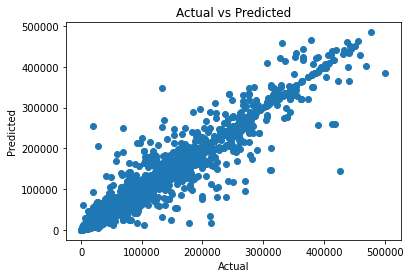

In [15]:
fig, ax = plt.subplots() 
ax.scatter(y_test, y_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()